# Gender Recognition Using Voice

**Importing The Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv('C:/Users/RDX/Desktop/Varun/Machine Learning/Kaggle Projects/voice.csv')

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
df.shape

(3168, 21)

**Dataset Discription:**
The goal is to classify the gender based on the voice features

The dataset containts 21 columns including 20 attributes and 1 taregt values whcih is the gender

The Dimensions of the dataset are 3167x21

In [45]:
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [7]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

**As shown above all the features are numerical and the target value is an object.**

In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

**There's no missing data in any of the features in the dataset**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df["label"] = LabelEncoder().fit_transform(df["label"])

**Data Visualization**

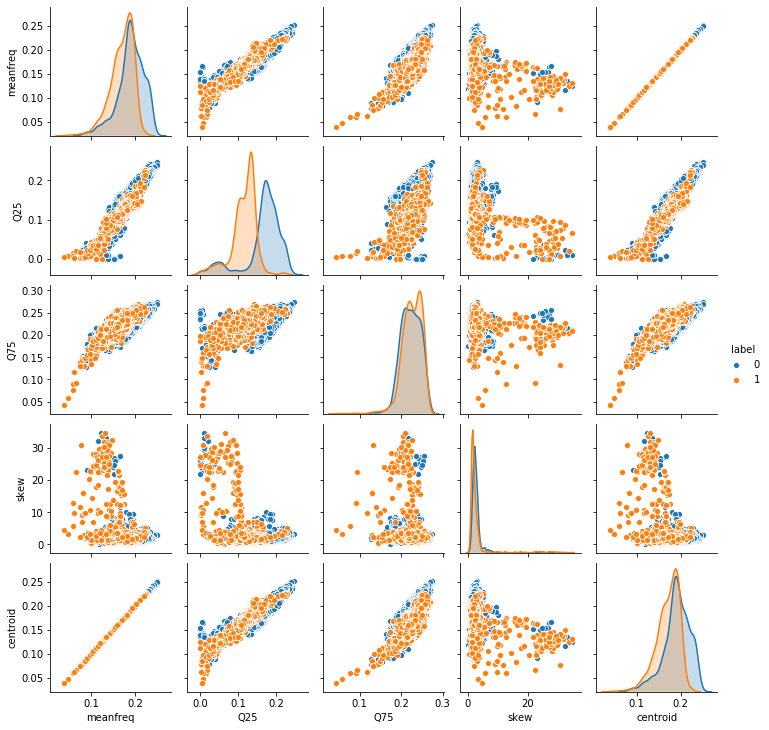

In [13]:
sns.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label', size=2)
plt.show()

This pairplot is plotted to show the relations between the dataset features and we find that the skewness with the quartiles are having a weak relation unlike the meanfreq with the centroid as they have a strong relation.

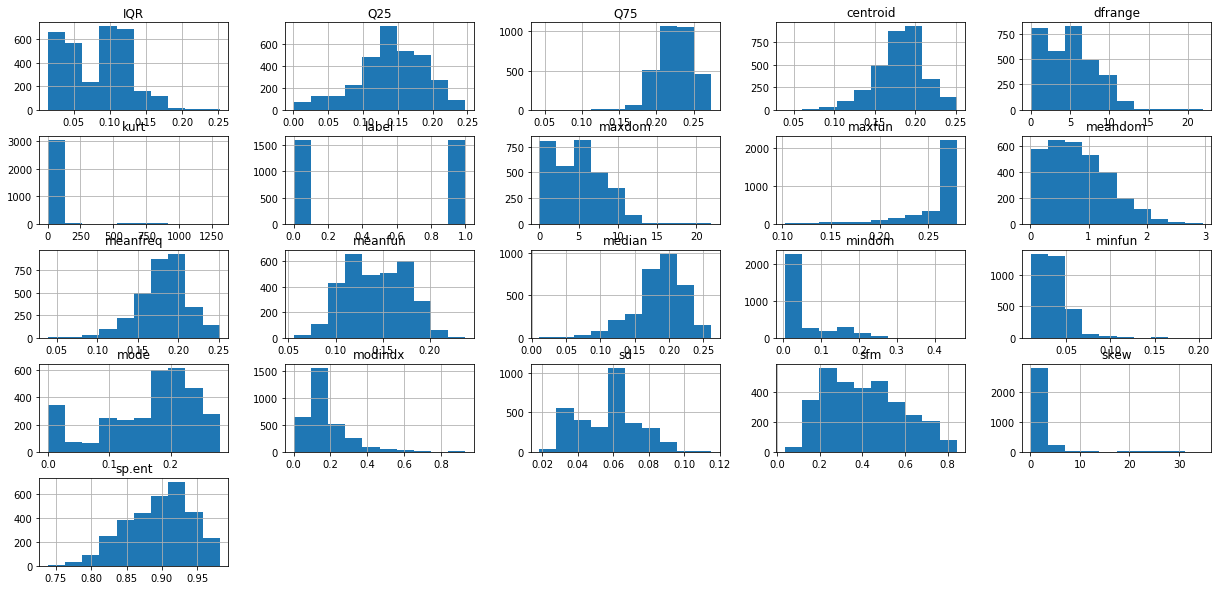

In [14]:
df.hist(figsize=(21, 10))
plt.show()

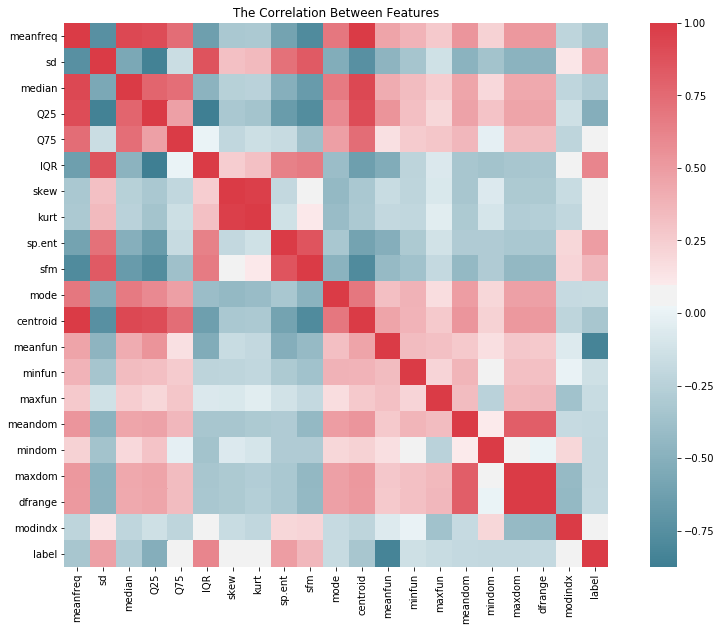

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

This Heatmap shows the correlations between the features; and by looking at it we find a positive correlation between the label and IQR, label and sp.ent, and a huge negative correlation between the label and meanfun

In [ ]:
#Checking the Outliers
plt.boxplot(df)
plt.show()
    

**PCA**

In [16]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
X=df.drop(['label'],axis=1)

In [18]:
X=X.values
#Scaling the values
x = scale(X)

In [19]:
pca= PCA(n_components=20)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var

array([4.52163908e-01, 1.18706090e-01, 1.09099393e-01, 7.61976317e-02,
       5.29393771e-02, 4.61496635e-02, 3.20448218e-02, 2.89839393e-02,
       2.45172645e-02, 1.87551752e-02, 1.65590573e-02, 8.95842514e-03,
       6.90291504e-03, 4.69046383e-03, 2.28912851e-03, 6.45523808e-04,
       3.97221935e-04, 1.93576569e-30, 2.19917520e-33, 1.14376449e-34])

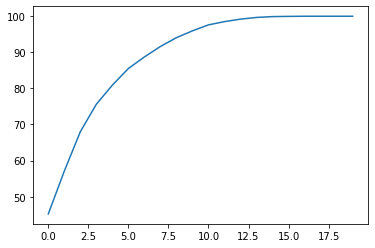

In [21]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1
plt.plot(var1)

In [22]:
#_________Eigen vector
pca_egvct = pca.components_

In [23]:
#_________Eigen values
pca_egvl = pca.explained_variance_

In [25]:
pca = PCA(n_components=15)
pca.fit(x)
X1=pca.fit_transform(x)
print(X1)

[[ 8.20851631  2.16448836  1.95978393 ...  0.25207627  0.16236545
   0.49878325]
 [ 8.67189184  3.85462661  4.10720799 ... -0.01187876 -0.52730177
   0.61918133]
 [ 9.11116887  4.51914027  7.52825158 ... -0.86019359 -0.24178411
   0.49033195]
 ...
 [ 3.83137839 -1.7814338   0.18707552 ...  1.09321101 -0.40496101
   0.06653497]
 [ 3.21441858 -1.95563325 -0.80087148 ...  0.66465408 -0.15863712
   0.06472907]
 [ 2.36104138 -1.33959575 -0.91383198 ... -0.27099631  0.03886603
   0.18062515]]


In [26]:
x1=X1
y=df[['label']]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.25)

**Model Building using Logistic regression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [36]:
model= LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
print('Coefficient of model :', model.coef_)
print('Intercept of model',model.intercept_)

Coefficient of model : [[ 1.13681109 -1.67627751  0.10916093 -1.2868485  -2.68971877  0.45944574
  -2.34158077 -0.27036459 -3.46589959 -0.29986211  0.20357807  0.53893216
   0.27747145 -0.13107659  1.06706675]]
Intercept of model [-0.85409534]


In [39]:
#finding prediction of response variable
ypred = model.predict(x_test)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       398
           1       0.98      0.96      0.97       394

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



In [43]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr) 
print(roc_auc)

0.9696579343417595


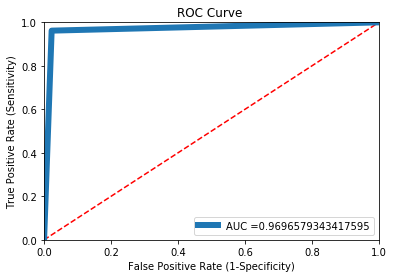

In [44]:
#ROC Curve
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=6)
plt.legend(loc=4) #Location of label
plt.show()